<a href="https://colab.research.google.com/github/iam-arshpreet/project-215/blob/main/projeccct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circle collision

Contributors : Arshpreet Singh, Vashu Singh

In this notebook, we have created a 2D-circle colliding animation.


In first code block, we will import all the required imports first.

In [103]:
import itertools
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

from ipywidgets import HTML

Now, we will create a Circle class to define all the characteristics of circle such as radius, color, speed with which circ le will be moving and its position of centre.

In [104]:
class Circle:
    ''' This class represents a circle.'''
    def __init__(self, radius: float, color: str, velocity=0, centre=(0, 0)):
        self.centre = centre
        self.radius = radius
        self.velocity = velocity
        self.color = color

    def motion(self, move_tuple=(0, 0)):
        ''' It moves the circle by provided distance as tuple of points on graph or by its velocity if distance is not provided.'''
        if move_tuple == (0, 0):
            new_centre = (self.centre[0] + int(self.velocity), self.centre[1] + int(self.velocity))
        else:
            new_centre = (self.centre[0] + move_tuple[0], self.centre[1] + move_tuple[1])
        self.centre = new_centre

    def collision_detection(self, other_circle):
        ''' This function detects if the two functions are colliding with each other and returns the boolean value.'''
        distance_bw_circles = math.sqrt(pow((self.centre[0] - other_circle.centre[0]), 2) +
                                       pow((self.centre[1] - other_circle.centre[1]), 2))
        return distance_bw_circles < (self.radius + other_circle.radius)

This code block will have a simulation class which handles all the circle objects automatically generated by this class upon providing number of circles.

In [105]:
class Simulation:
    ''' Manages all the circle objects'''

    def __init__(self, n_circles):
        self.circles = [0]*n_circles
        self.n_circles = n_circles
        for i in range(self.n_circles):
            rad = 20
            cent = (random.randint(200, 800), random.randint(300, 600))
            vel = random.randint(10,20)
            colors = ['red', 'blue', 'green', 'black']
            col = colors[random.randint(0,3)]
            self.circles[i] = (Circle(rad, col, vel, cent))

    def collision(self):
        ''' handles collision and decide what will happen in the condition.'''
        for circle in self.circles:
            circle.motion()
        for circle1, circle2 in itertools.combinations(self.circles, 2):  #idea of itertools from stack overflow
            if circle1.collision_detection(circle2) :
                circle1.velocity = -circle1.velocity
            if (circle1.centre[0] or circle1.centre[1] or circle2.centre[0] or circle2.centre[1] )>980:
                circle1.velocity = 0
                circle1.velocity =  random.randint(-20,-10)
            if (circle1.centre[0] or circle1.centre[1] or circle2.centre[0] or circle2.centre[1])<100:
                circle1.velocity = 0
                circle1.velocity =  random.randint(10,20)

    def animate(self):
        ''' Function to animate the circles'''
        fig, ax = plt.subplots()
        ax.set_xlim(0, 1000)
        ax.set_ylim(0, 1000)
        circles_plot = [plt.Circle(circle.centre, circle.radius, color=circle.color) for circle in self.circles ]

        # def init():
        #     ''' It serves as a base for FuncAnimation'''
        #     ax.set_xlim(0, 1000)
        #     ax.set_ylim(0, 1000)

        def update(frame):
            '''FunAnimation will change the animation according to this function.'''
            self.collision()
            for j in range(len(circles_plot)):
                circles_plot[j].center = self.circles[j].centre
            for circle_plot in circles_plot:
                ax.add_patch(circle_plot)

        anim = FuncAnimation(fig, update, frames= 1)
        HTML(anim.to_jshtml())


In this code block, we will use our code in an example.

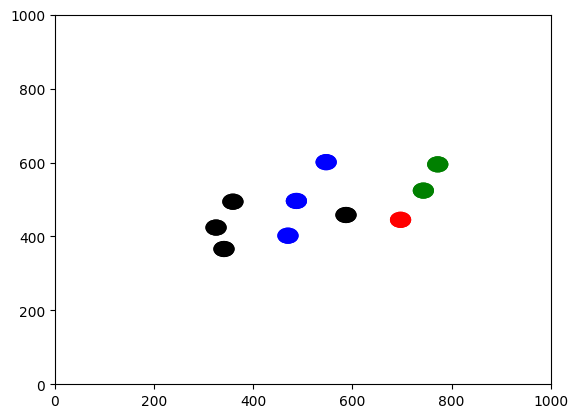

In [106]:
# Example

a = Simulation(10)
a.animate()